In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp

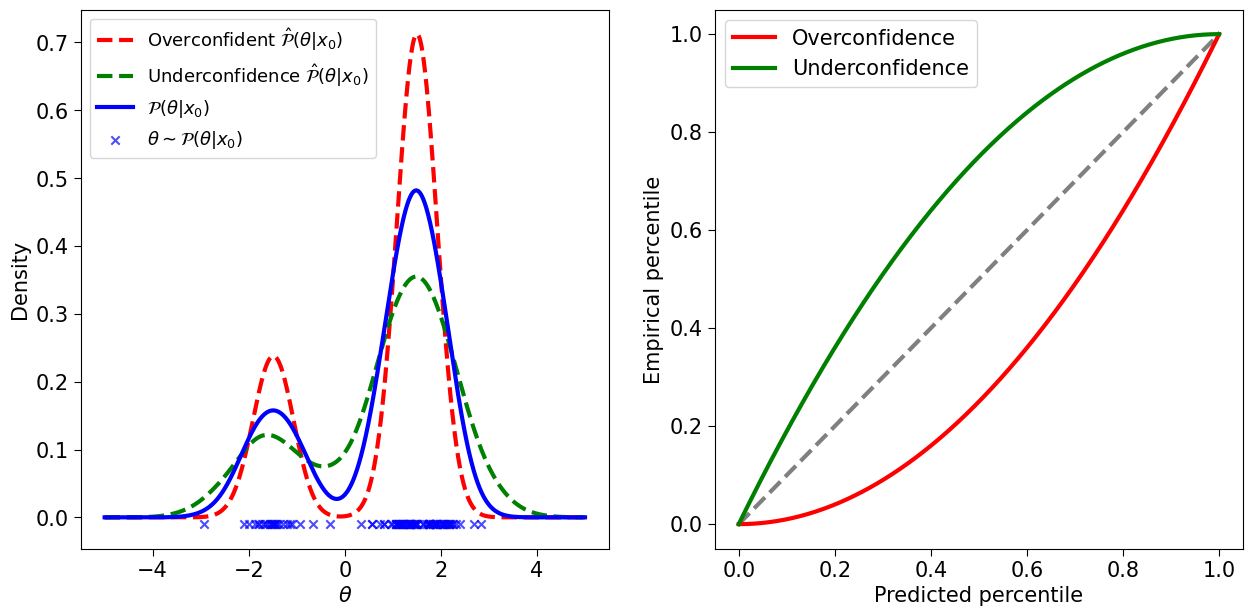

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Adjusted Step 1: Generate samples from a bimodal distribution with closer peaks
n_samples = 1000
# Peaks are closer to each other but still bimodal
samples_peak1 = np.random.normal(loc=1.5, scale=0.50, size=int(n_samples*0.75))
samples_peak2 = np.random.normal(loc=-1.5, scale=0.50, size=int(n_samples*0.25))
bimodal_samples = np.concatenate([samples_peak1, samples_peak2])

# Adjusted Step 2: Generate samples from an overconfident estimation
# Centered at 0, but with a smaller scale to put more mass around the peak
overconfident_samples_peak1 = np.random.normal(loc=1.5, scale=0.25, size=int(n_samples*0.75))
overconfident_samples_peak2 = np.random.normal(loc=-1.5, scale=0.25, size=int(n_samples*0.25))
overconfident_samples = np.concatenate([overconfident_samples_peak1, overconfident_samples_peak2])

underconfident_samples_peak1 = np.random.normal(loc=1.5, scale=0.75, size=int(n_samples*0.75))
underconfident_samples_peak2 = np.random.normal(loc=-1.5, scale=0.75, size=int(n_samples*0.25))
underconfident_samples = np.concatenate([underconfident_samples_peak1, underconfident_samples_peak2])

# Step 3: Plot both distributions and samples
# Calculate the density for plotting
density_bimodal = gaussian_kde(bimodal_samples)
density_overconfident = gaussian_kde(overconfident_samples)
density_underconfident = gaussian_kde(underconfident_samples)
x = np.linspace(-5, 5, 1000)

fig =  plt.figure(figsize=(15, 7))
ax=fig.add_subplot(121)
# Plotting the distributions
ax.plot(x, density_overconfident(x), label=r'Overconfident $\hat{\mathcal{P}}(\theta|x_0)$', color='red', linestyle='--', linewidth=3)
ax.plot(x, density_underconfident(x), label=r'Underconfidence $\hat{\mathcal{P}}(\theta|x_0)$', color='green', linestyle='--',  linewidth=3)
ax.plot(x, density_bimodal(x), label=r'$\mathcal{P}(\theta|x_0)$', color='blue',  linewidth=3)

ax.scatter(bimodal_samples[::10], np.full_like(bimodal_samples[::10], -0.01), alpha=0.7, marker='x', color='blue', label=r'$\theta \sim \mathcal{P}(\theta|x_0)$')

ax.legend(fontsize=13)
ax.set_xlabel(r'$\theta$', fontsize=15)
ax.set_ylabel('Density',  fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15, size=5)  # Adjusts both x and y ticks and labels
ax.tick_params(axis='both', which='major', labelsize=15, size=5)  # Adjusts both x and y ticks and labels



ax = fig.add_subplot(122)
ax.plot([0, 1], [0, 1], '--', color='gray',  linewidth=3)

x = np.linspace(0, 1, 500)
y = x**2  # Quadratic function for the arch under the diagonal
ax.plot(x, y, color='red', label='Overconfidence',  linewidth=3)

y_over = -x**2 + 2*x  # Quadratic function for the arch over the diagonal
ax.plot(x, y_over, color='green', label='Underconfidence',  linewidth=3)

ax.set_xlabel('Predicted percentile', fontsize=15)
ax.set_ylabel('Empirical percentile', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15, size=5)  # Adjusts both x and y ticks and labels
ax.tick_params(axis='both', which='major', labelsize=15, size=5)  # Adjusts both x and y ticks and labels
ax.legend(fontsize=15)

plt.show()

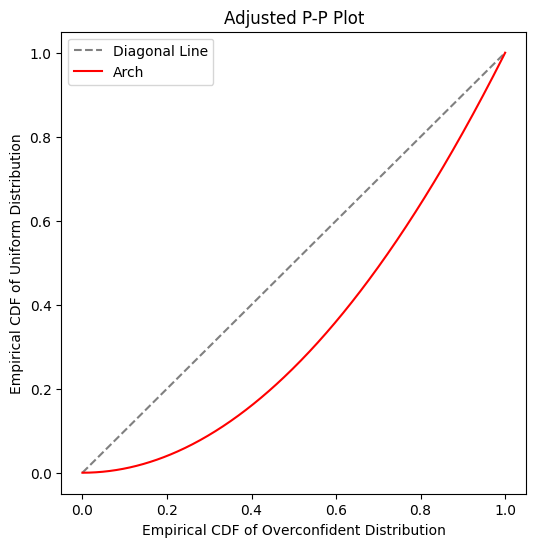

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Draw the diagonal line
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], '--', color='gray', label='Diagonal Line')

# Calculate the arch points
x = np.linspace(0, 1, 500)
y = x**2  # Quadratic function for the arch

# Plot the arch
ax.plot(x, y, color='red', label='Arch')

ax.set_xlabel('Empirical CDF of Overconfident Distribution')
ax.set_ylabel('Empirical CDF of Uniform Distribution')
ax.set_title('Adjusted P-P Plot')
ax.legend()

plt.show()

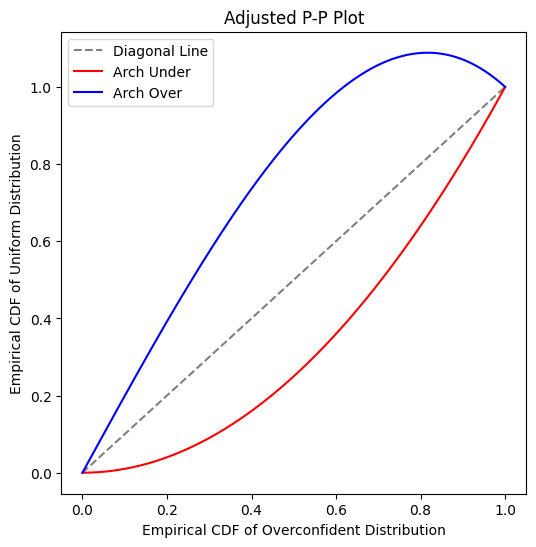

In [41]:
# Existing code for setting up the plot
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([0, 1], [0, 1], '--', color='gray', label='Diagonal Line')

x = np.linspace(0, 1, 500)
y = x**2  # Quadratic function for the arch under the diagonal

ax.plot(x, y, color='red', label='Arch Under')

# Calculate and plot the asymmetrical arch over the diagonal
y_over = -x**3 + 2*x  # Cubic function for the arch over the diagonal
ax.plot(x, y_over, color='blue', label='Arch Over')

ax.set_xlabel('Empirical CDF of Overconfident Distribution')
ax.set_ylabel('Empirical CDF of Uniform Distribution')
ax.set_title('Adjusted P-P Plot')
ax.legend()

plt.show()

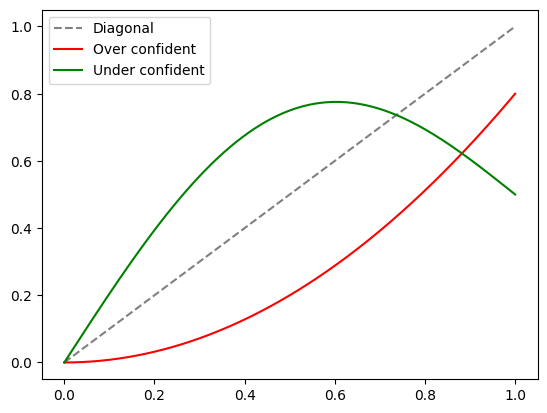

In [53]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 500)

# Adjusted arch under the diagonal
y = (x**2) * 0.8  # Scale down to ensure it stays within the square

# Adjusted arch over the diagonal using a sine function to ensure it's over the diagonal
y_over = np.sin(x * np.pi) * 0.5 + 0.5 * x

fig = plt.figure()
plt.plot(x, x, '--', color='gray', label='Diagonal')  # Diagonal for reference
plt.plot(x, y, color='red', label='Over confident')
plt.plot(x, y_over, color='green', label='Under confident')

plt.legend()
plt.show()